# **2. Clustering(클러스터링)**

In [20]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [21]:
# 가공된 데이터 불러오기
df = pd.read_csv('EDA_data.csv')

In [22]:
# 데이터 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5547220 entries, 0 to 5547219
Data columns (total 9 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   customer_id      int64 
 1   pre_discount     int64 
 2   post_discount    int64 
 3   cashback_amount  int64 
 4   discount_amount  int64 
 5   total_promotion  int64 
 6   gender           object
 7   age              int64 
 8   age_category     int64 
dtypes: int64(8), object(1)
memory usage: 380.9+ MB


In [23]:
# 분석에 필요없는 데이터 삭제
df = df.drop(['cashback_amount','gender','discount_amount','age_category','customer_id','pre_discount'],  axis=1)

In [24]:
df.head()

,post_discount,total_promotion,age
0,36236,1087,66
1,12900,387,40
2,7500,225,48
3,11800,354,27
4,29700,891,24


In [25]:
# 1) 구매액도 높고 할인률도 좋은 연령대, 2)  구매액은 높으나 할인률은 낮은 연령대 3) 모두 낮은 연령대
age_df = df.groupby('age', as_index=False).mean()
age_df

,age,post_discount,total_promotion
0,19,12663.585851,1150.489315
1,20,13917.502364,1244.797577
2,21,14620.359807,1267.526795
3,22,17600.874149,1336.075589
4,23,17598.952628,1368.786238
...,...,...,...
57,76,20925.228636,1719.869565
58,77,19876.056417,1516.318054
59,78,31561.639397,2151.743811
60,79,16684.514041,1535.199688


In [26]:
# n_clusters 은 3가지 유형으로 분류하기 위해 3으로 지정
kmeans = KMeans(n_clusters=3)

In [27]:
# Clustering
kmeans.fit_predict(age_df)

c:\Users\rhlab\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 1, 1, 0, 0, 0, 1, 2, 2])

In [30]:
# Clustering 확인
cluster = kmeans.labels_
print(cluster)

[2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 0 2 0 2 0 2 0 1 1 0 0 0 1 2 2]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


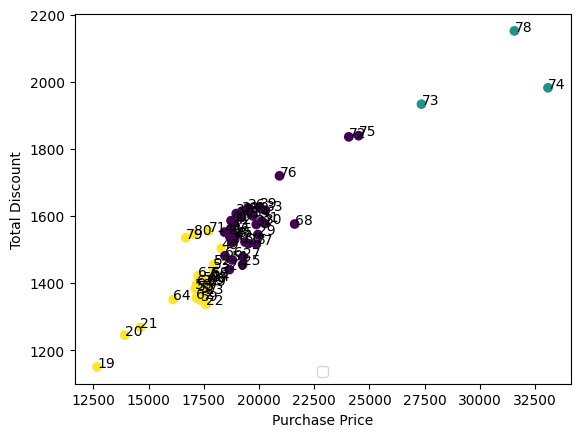

In [29]:
# 플롯 생성
plt.scatter(age_df['post_discount'], age_df['total_promotion'], c=cluster)
plt.xlabel("Purchase Price")
plt.ylabel("Total Discount")

# 범례 지정을 위해 좌표 값 지정
for row in age_df.itertuples():
    plt.annotate(row.age, (row.post_discount, row.total_promotion))
plt.legend(loc=8)
plt.show()